<a href="https://colab.research.google.com/github/amkayhani/Statistics/blob/main/Discrete_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Binomial Distribution**
**Problem:** A small manufacturing company that produces customized exhaust pipes for cars sells 20 products to its customers every week. Customers are a little bit concerned about quality and have raised a lot of complaints over the last couple of months. After conducting some experiments, the company found out that there is a 15% chance that a product can be defective. Are the customers right to complain?

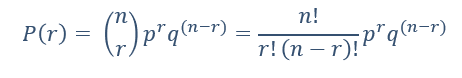

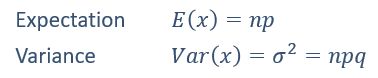


In [1]:
#Import the binom from the scipy library
from scipy.stats import binom
#import the pandas library
import pandas as pd

# Create a list
data = []
n = 20  # number of trials
p = 0.15 # probability of success

# Loop through each value of r(1,2,...,20)
for r in range(0, n+1):
    # Calculate the probability for the r
    prob = binom.pmf(k=r, n=n, p=p)
    # Convert probability to float with regular notation
    prob_float = "{:.5f}".format(prob)
    # Calculate the percentage and format it
    percentage = "{:.5f}".format(prob * 100)
    # Append the result as a dictionary to the data list
    data.append({'r': r, 'P(r)': prob_float, 'P(r) %': percentage})

# Create the DataFrame from the list of dictionaries
probabilities_df = pd.DataFrame(data)

probabilities_df


,r,P(r),P(r) %
0,0,0.03876,3.87595
1,1,0.13680,13.67983
2,2,0.22934,22.93384
3,3,0.24283,24.28289
4,4,0.18212,18.21217
5,5,0.10285,10.28452
6,6,0.04537,4.53729
7,7,0.01601,1.60140
8,8,0.00459,0.45922
9,9,0.00108,0.10805


r          int64
P(r)      object
P(r) %    object
dtype: object
r           int64
P(r)       object
P(r) %    float64
dtype: object


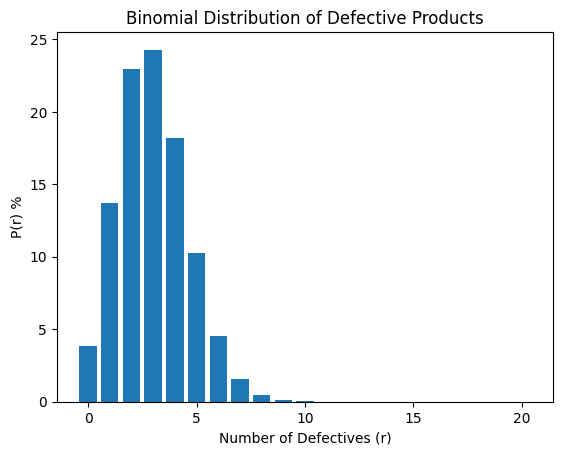

In [2]:
import matplotlib.pyplot as plt

# Convert the 'Probability' column to float for plotting
print(probabilities_df.dtypes)
probabilities_df['P(r) %'] = probabilities_df['P(r) %'].astype(float)
print(probabilities_df.dtypes)

# Create a histogram for the probabilities
plt.bar(probabilities_df['r'], probabilities_df['P(r) %'])

# Set the title and labels
plt.title('Binomial Distribution of Defective Products')
plt.xlabel('Number of Defectives (r)')
plt.ylabel('P(r) %')

# Display the plot
plt.show()


**Decision:** Customers are right to complain

Apparently, an E(x) = 3 in 20 is not good performance and therefore customers are right to complain. A process improvement program to reduce the probability of having defective products is urgent.


# **2. Hypergeometric Distribution**
**Problem:** A company that produces chipsets in batches of 20 and they would like to test their performance. Testing such components can be very expensive so they decided to test a sample of 5 products from a batch. Testing occurs without replacement of defective products. From past data, it is known that the defect rate is around 10%. Could you model the distribution of the defective products in the sample chosen?

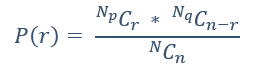

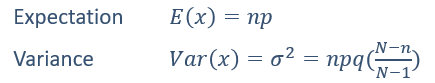


In [3]:
#import the required libraries
from scipy.stats import hypergeom
import pandas as pd

M = 20  # total number of chipsets in a batch
n = 5   # number of chipsets tested
N = int(M * 0.10)  # number of defective chipsets in the batch (10% of 20)

# Create a list
probabilities = []

# Calculate the probability for each possible number of defective chipsets found in the sample
for r in range(0, n+1):
    prob = hypergeom.pmf(r, M, N, n)
    # Calculate the percentage
    percentage = prob * 100
    # Append to the list
    probabilities.append({
        'r': r,
        'P(r)': prob,
        'P(r) %': percentage
    })

# Create a DataFrame from the list
distribution_df = pd.DataFrame(probabilities)

distribution_df


,r,P(r),P(r) %
0,0,0.552632,55.263158
1,1,0.394737,39.473684
2,2,0.052632,5.263158
3,3,0.000000,0.000000
4,4,0.000000,0.000000
5,5,0.000000,0.000000


r           int64
P(r)      float64
P(r) %    float64
dtype: object


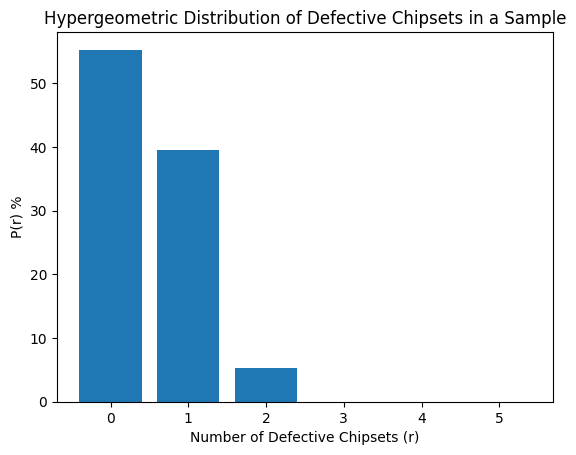

In [4]:
# Plotting the histogram
print(distribution_df.dtypes)
plt.bar(distribution_df['r'], distribution_df['P(r) %'])

# Set the labels
plt.title('Hypergeometric Distribution of Defective Chipsets in a Sample')
plt.xlabel('Number of Defective Chipsets (r)')
plt.ylabel('P(r) %')

# Display the plot
plt.show()


**Decision:** Use of the hypergeometric destribution

The E(x) = 0.5 in a sample of 5 products, which is a logical value provided that x = 0 and x = 1 have the highest chances of being the case. If the inspection process starts producing more defective process, for example constantly 3 or 4 chipsets, then the process needs to be investigated.  


# **3. Negative Binomial Distribution**
**Problem:** A customer is interested in observing the production process of a company the produces red tiles. While the process is very capable, there is a probability of 0.5% that the tile produced will not be of the right colour. While this is not a huge cost for the company, it may look bad if a defective tile is produced during the inspection. The customer wants to inspect 20 tiles that have been produced consecutively. What is the probability of the customer inspecting a tile that is defective?

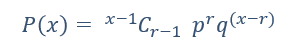

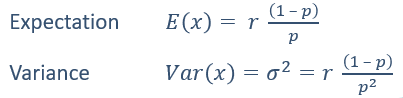

In [5]:
n_tiles = 20  # number of tiles the customer wants to inspect
p_defective = 0.005  # probability of a tile being defective

# Initialize an empty list to store the probability and cumulative probability
probabilities = []

# Calculate the probability and cumulative probability for each number of tiles inspected
for x in range(1, n_tiles + 1):
    # The probability of finding no defective tiles among x inspected tiles
    p_no_defectives = (1 - p_defective) ** x
    # The cumulative probability of finding one defective tile among x inspected tiles
    p_cumulative = 1 - p_no_defectives
    # The probability of the x-th tile being the first defective tile found
    p_x = p_defective * ((1 - p_defective) ** (x - 1))

    # Append the results to the list
    probabilities.append({
        'x': x,
        'P(x)': "{:.4}".format(p_x),
        'P(x) %': "{:.4%}".format(p_x),
        'Cum. Pr. %': "{:.3%}".format(p_cumulative)
    })

# Create a DataFrame from the list of dictionaries
probabilities_df = pd.DataFrame(probabilities)

probabilities_df


,x,P(x),P(x) %,Cum. Pr. %
0,1,0.005,0.5000%,0.500%
1,2,0.004975,0.4975%,0.997%
2,3,0.00495,0.4950%,1.493%
3,4,0.004925,0.4925%,1.985%
4,5,0.004901,0.4901%,2.475%
5,6,0.004876,0.4876%,2.963%
6,7,0.004852,0.4852%,3.448%
7,8,0.004828,0.4828%,3.931%
8,9,0.004803,0.4803%,4.411%
9,10,0.004779,0.4779%,4.889%


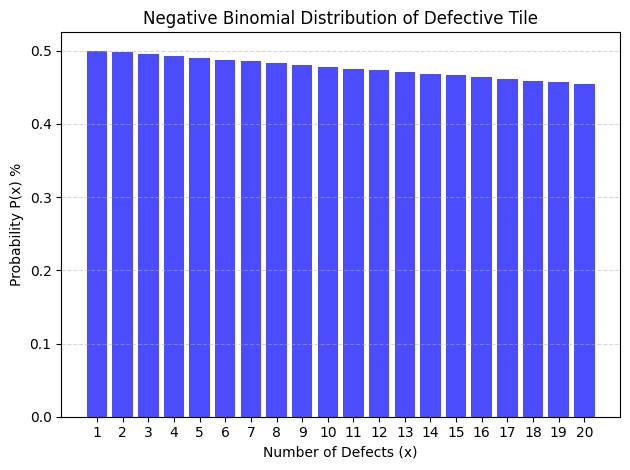

In [6]:
# create the histogram for the individual probabilities P(x)
plt.bar(probabilities_df['x'], probabilities_df['P(x) %'].str.rstrip('%').astype('float') , color='blue', alpha=0.7) #alpha sets the trasnparency of the bars
plt.title('Negative Binomial Distribution of Defective Tile')
plt.xlabel('Number of Defects (x)')
plt.ylabel('Probability P(x) %')
plt.xticks(range(1, n_tiles + 1))
plt.grid(axis='y', linestyle='--', alpha=0.5) #alpha sets the trasnparency of the dashed lines
plt.tight_layout()
plt.show()


**Decision:** Bad idea

The probability is equal to 9.54% which is not as low as expected and the company will probably take a risk of having the customer inspecting the production process.


# **4. Poisson Distribution**

**Problem:** A quality inspector of a manufacturing company is responsible for tracing bumps on a specific product’s surface. In case there are any bumps the product needs to be further processed and repaired before it is sent to the customer. The customer offered that if the company can guarantee that the delivered products will have less than 4 bumps/per product, then they can make the extra processing in their facilities at no extra cost, as they will benefit from earlier delivery. However, if this deal is accepted, then there will be a free replacement penalty for products with 5 bumps or more. Should the company accept the offer?

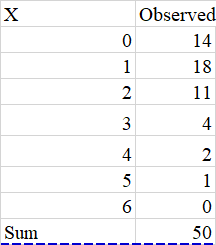

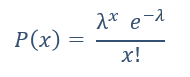

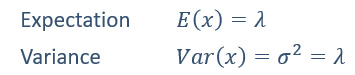

In [11]:
from scipy.stats import poisson

#data
observed_data = {0: 14, 1: 18, 2: 11, 3: 4, 4: 2, 5: 1, 6: 0} # data type: dictionary. The number before the ':' is the key/index; in this questions key/index and x have same values
total_observations = sum(observed_data.values())

#Initialising sum_vc and mean_lambda
sum_vc = 0
mean_lambda = 0

# Calculate the mean (λ) of the observed data for the Poisson distribution
# The mean is the sum of (value * frequency) for each observation, divided by the total number of observations
for value, count in observed_data.items():
    sum_vc += value * count   #same as: sum_vc = sum_vc + value * count
mean_lambda = sum_vc/total_observations

# Calculate P(x) and Expected values using the Poisson distribution
data = []
for x in range(0, max(observed_data.keys()) + 1):
    # Calculate P(x) using the poisson distribution
    p_x = poisson.pmf(k=x, mu=mean_lambda)
    # Calculate the expected frequency
    expected = p_x * total_observations
    # Append to the list
    data.append({'X': x, 'Observed': observed_data.get(x, 0), 'P(x)': "{:.2%}".format(p_x), 'Expected': expected})  # in 'observed_data.get(x, 0)', 0 is default value

# add sum/total row to the last row
data.append({
    'X': 'Sum',
    'Observed': total_observations,
    'P(x)': "{:.2%}".format(sum(poisson.pmf(k=x, mu=mean_lambda) for x in observed_data.keys())),
    'Expected': total_observations
})

# Convert to DataFrame
results_df = pd.DataFrame(data)

results_df


,X,Observed,P(x),Expected
0,0,14,27.25%,13.626590
1,1,18,35.43%,17.714567
2,2,11,23.03%,11.514468
3,3,4,9.98%,4.989603
4,4,2,3.24%,1.621621
5,5,1,0.84%,0.421621
6,6,0,0.18%,0.091351
7,Sum,50,99.96%,50.000000


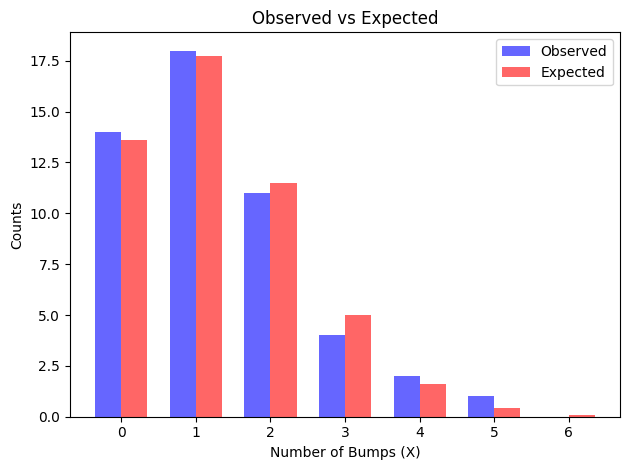

In [8]:
import numpy as np
observed_values = results_df['Observed'][:-1]  # Exclude the 'Sum' row
expected_values = results_df['Expected'][:-1]  # Exclude the 'Sum' row
x_values = results_df['X'][:-1]  # Exclude the 'Sum' label

# Plotting both observed and expected values
bar_width = 0.35  # the width of the bars
index = np.arange(len(x_values))  # the label locations

fig, ax = plt.subplots()
bar1 = ax.bar(index, observed_values, bar_width, label='Observed', color='b', alpha=0.6)
bar2 = ax.bar(index + bar_width, expected_values, bar_width, label='Expected', color='r', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Bumps (X)')
ax.set_ylabel('Counts')
ax.set_title('Observed vs Expected')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x_values)
ax.legend()   #to add the legend box

# Display the plot
plt.tight_layout() #optional:just to make some adjustments on the layout if necessary
plt.show()


**Decision:** Low probability

The data seems to follow the Poisson distribution and therefore it can be said that the probability of having more than 4 bumps in a product is low.


# **Exercise 1:**

A local bakery that specializes in artisanal bread sells 50 loaves every day. Recently, there has been an increase in customer complaints regarding the quality of the bread. After thorough analysis, the bakery found that there is a 10% chance that a loaf may be underbaked. Should customers be concerned about the bread quality?


In [9]:
#Use this place to write and run your code

# **Exercise 2:**

In an e-commerce fulfillment center, a team is responsible for packaging electronic gadgets. The team has observed that, on average, there are 2.5 packaging errors (such as incorrect labels or missing components) per batch of 20 products. The e-commerce platform has offered a deal: if the company can ensure fewer than 4 errors per batch, the platform will cover the cost of expedited shipping for all orders in that batch. However, if the error count reaches 5 or more, the company will have to provide free replacements for the affected products. Should the e-commerce company accept this offer?

a) What is the probability of exactly three errors?

b) What is the probability of less than three errors?

In [10]:
#Use this place to write and run your code